In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from scipy.stats import mode
sns.set_style('whitegrid')

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) 

In [3]:
df = pd.read_csv(r"D:\IMARTICUS LEARNING\movies.csv")

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.shape

(7668, 15)

In [6]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
def replace_null_values(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            mode_value = mode(dataframe[column]).mode[0]
            dataframe[column].fillna(mode_value, inplace=True)
        else:
            median_value = np.nanmedian(dataframe[column])
            dataframe[column].fillna(median_value, inplace=True)
    return dataframe

In [11]:
replace_null_values(df)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Universal Pictures,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,104.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Universal Pictures,120.0


In [12]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [38]:
movies = df[['name','genre','year','votes','score','director','star','budget','gross','company','released','rating','writer','country','runtime']]
movies.head()

,name,genre,year,votes,score,director,star,budget,gross,company,released,rating,writer,country,runtime
0,The Shining,Drama,1980,927000,8.4,Stanley Kubrick,Jack Nicholson,19000000,46998772,Warner Bros.,"June 13, 1980 (United States)",R,Stephen King,United Kingdom,146.0
1,The Blue Lagoon,Adventure,1980,65000,5.8,Randal Kleiser,Brooke Shields,4500000,58853106,Columbia Pictures,"July 2, 1980 (United States)",R,Henry De Vere Stacpoole,United States,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,1200000,8.7,Irvin Kershner,Mark Hamill,18000000,538375067,Lucasfilm,"June 20, 1980 (United States)",PG,Leigh Brackett,United States,124.0
3,Airplane!,Comedy,1980,221000,7.7,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,"July 2, 1980 (United States)",PG,Jim Abrahams,United States,88.0
4,Caddyshack,Comedy,1980,108000,7.3,Harold Ramis,Chevy Chase,6000000,39846344,Orion Pictures,"July 25, 1980 (United States)",R,Brian Doyle-Murray,United States,98.0


In [16]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [17]:
df 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120.0


In [55]:
df.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [20]:
pd.set_option('display.max_rows', None)

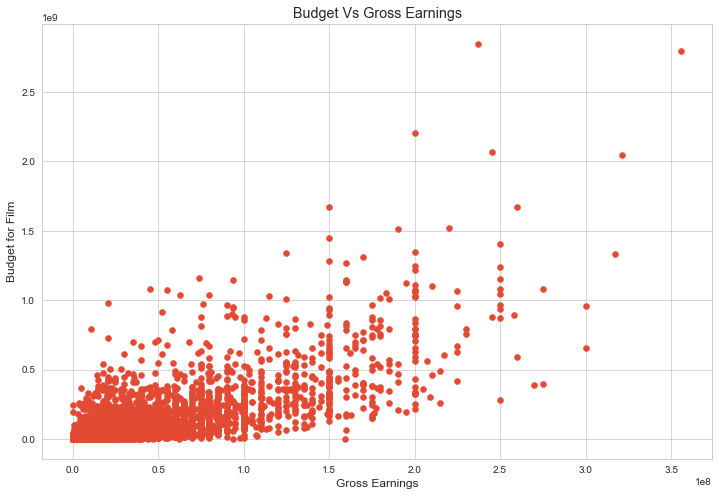

In [23]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')
plt.show()

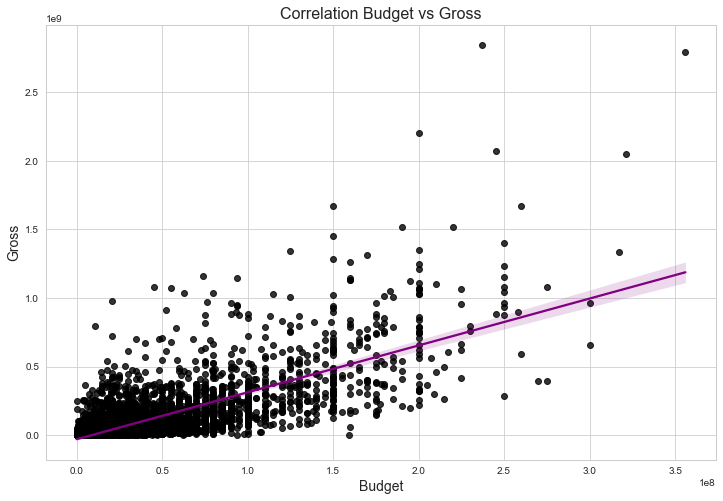

In [26]:
#Plot for Budget Vs Gross Correlation

sns.regplot(data=df, x='budget', y='gross', color='black',line_kws={'color': 'purple'})

plt.title('Correlation Budget vs Gross', size=16)
plt.xlabel('Budget', size=14)
plt.ylabel('Gross', size=14)

plt.show()

In [27]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000


### High Correlation Between Budget and Gross

In [30]:
matrix = df.corr()

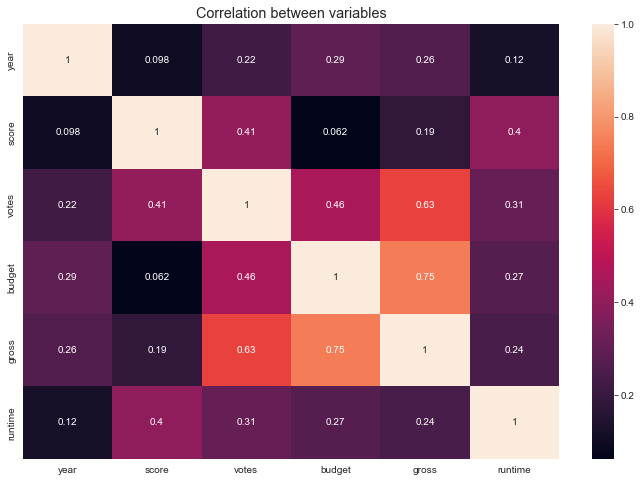

In [33]:
sns.heatmap(matrix, annot=True)

plt.title('Correlation between variables')

plt.show()

In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [39]:

df_numerized = movies

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [50]:
df_numerized.head()

,name,genre,year,votes,score,director,star,budget,gross,company,released,rating,writer,country,runtime
0,6587,6,1980,927000,8.4,2589,1047,19000000,46998772,2319,1705,6,4014,54,146.0
1,5573,1,1980,65000,5.8,2269,327,4500000,58853106,731,1492,6,1632,55,104.0
2,5142,0,1980,1200000,8.7,1111,1745,18000000,538375067,1540,1771,4,2567,55,124.0
3,286,4,1980,221000,7.7,1301,2246,3500000,83453539,1812,1492,4,2000,55,88.0
4,1027,4,1980,108000,7.3,1054,410,6000000,39846344,1777,1543,6,521,55,98.0


In [52]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [42]:
matrix = df_numerized.corr()

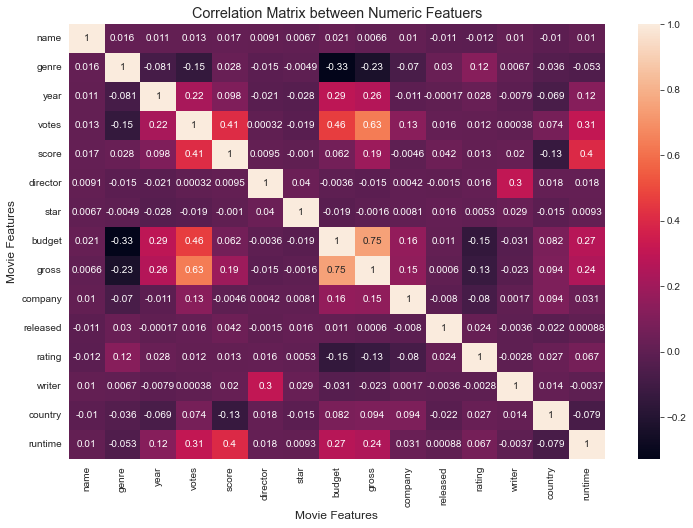

In [44]:
sns.heatmap(matrix, annot=True)

plt.title('Correlation Matrix between Numeric Featuers')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [46]:
df_numerized.corr()

,name,genre,year,votes,score,director,star,budget,gross,company,released,rating,writer,country,runtime
name,1.000000,0.016355,0.011453,0.013056,0.017105,0.009079,0.006749,0.020921,0.006601,0.010369,-0.010753,-0.012441,0.010018,-0.010425,0.010335
genre,0.016355,1.000000,-0.081261,-0.145291,0.027965,-0.015258,-0.004856,-0.328484,-0.233385,-0.070013,0.030242,0.123465,0.006746,-0.035896,-0.052719
year,0.011453,-0.081261,1.000000,0.222573,0.098013,-0.020795,-0.027745,0.291690,0.259504,-0.011438,-0.000174,0.027931,-0.007901,-0.069423,0.120662
votes,0.013056,-0.145291,0.222573,1.000000,0.409157,0.000316,-0.019371,0.460968,0.632120,0.130562,0.016003,0.012286,0.000379,0.073522,0.309151
score,0.017105,0.027965,0.098013,0.409157,1.000000,0.009540,-0.001006,0.061931,0.185563,-0.004570,0.042407,0.013276,0.019745,-0.134557,0.399407
director,0.009079,-0.015258,-0.020795,0.000316,0.009540,1.000000,0.039715,-0.003584,-0.014758,0.004250,-0.001511,0.016255,0.299512,0.017926,0.017611
star,0.006749,-0.004856,-0.027745,-0.019371,-0.001006,0.039715,1.000000,-0.018814,-0.001640,0.008072,0.015561,0.005314,0.028745,-0.014749,0.009253
budget,0.020921,-0.328484,0.291690,0.460968,0.061931,-0.003584,-0.018814,1.000000,0.745881,0.164213,0.010940,-0.148543,-0.031050,0.081816,0.273371
gross,0.006601,-0.233385,0.259504,0.632120,0.185563,-0.014758,-0.001640,0.745881,1.000000,0.153347,0.000596,-0.130478,-0.023028,0.093622,0.244380
company,0.010369,-0.070013,-0.011438,0.130562,-0.004570,0.004250,0.008072,0.164213,0.153347,1.000000,-0.008007,-0.079626,0.001665,0.094210,0.030999


In [53]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name     1.000000
      genre    0.016355
      year     0.011453
      votes    0.013056
      score    0.017105
dtype: float64

In [54]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.328484
genre   budget   -0.328484
        gross    -0.233385
gross   genre    -0.233385
rating  budget   -0.148543
dtype: float64

In [49]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.632120
gross     votes       0.632120
          budget      0.745881
budget    gross       0.745881
name      name        1.000000
budget    budget      1.000000
writer    writer      1.000000
rating    rating      1.000000
released  released    1.000000
company   company     1.000000
gross     gross       1.000000
star      star        1.000000
director  director    1.000000
score     score       1.000000
votes     votes       1.000000
year      year        1.000000
genre     genre       1.000000
country   country     1.000000
runtime   runtime     1.000000
dtype: float64

 #### Votes and budget have the highest correlation 
 #### company has low correlation